In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import random
import os 
from os.path import dirname
import re
import json 
import time

# Pytorch
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.nn import Parameter
from torch.utils.data import Dataset
from torch.utils.data import Dataset
%matplotlib inline

# Custom modules
from data_utils import create_csv, split_train_test
from data_loader import DataGenerator, CroperNormalizer

# Dataset creator

### 1 - Create csv containing files names

In [4]:
dataset_name = 'blender_v3'
datas = create_csv(dataset_name=dataset_name,datas_list=['depth_map', 'annotations', 'mask'])
datas.head()

,depth_map,mask_right,annotations,mask_left
0,depth_map_0.npy,right_0.npy,annot_0.json,left_0.npy
1,depth_map_1.npy,right_1.npy,annot_1.json,left_1.npy
2,depth_map_2.npy,right_2.npy,annot_2.json,left_2.npy
3,depth_map_3.npy,right_3.npy,annot_3.json,left_3.npy
4,depth_map_4.npy,right_4.npy,annot_4.json,left_4.npy


### 2 - Creating a DataGenerator

Creating this class allows us to load data per data instead of the whole dataset in order to avoid to fill up RAM. These files should be saved in a python module instead of being defined in the notebook (same for all functions defined in these notebooks), since I am coding from my mac I cannot mount the root/ on my computer and develop in sublimetext

In [5]:
whole_dataset = DataGenerator(dataframe=datas,
                              dataset_name=dataset_name,
                              datas_list=['depth_map', 'mask_left', 'annotations'],
                              target_list=None)

### 3 - Depth map masked & normalized dataset creator

We could integrate this function to the DataLoader but this would take time during training and at inference, therefore we create a new dataset

In [6]:
regenerate_dataset = False

In [7]:
if regenerate_dataset:
    processor = CroperNormalizer()
    dataset_name = 'blender_v3'
    datas = pd.read_csv(dataset_name + '.csv')
    whole_dataset = DataGenerator(dataframe=datas,
                                  dataset_name=dataset_name,
                                  datas_list=['depth_map', 'mask_left', 'annotations'],
                                  target_list=None)
    for ix in range(len(whole_dataset)):
        data = whole_dataset[ix]
        input_data, label_data = processor.process_dmap(data)
        np.save('../data/blender_v3_croped_normalized_dmap_300_100/depth_map/depth_map_' + str(ix) + '.npy',
            input_data.T)
        with open( '../data/blender_v3_croped_normalized_dmap_300_100/annotations/annot_' + str(ix) + '.json', 'w') as fp:
            json.dump(label_data, fp)

### 4- Loading the dataset & visualisation

In [8]:
dataset_name = 'blender_v3_croped_normalized_dmap_300_100'
datas_list = ['depth_map', 'annotations']
datas = pd.read_csv(dataset_name + '.csv', index_col=0)
dataset = DataGenerator(dataframe=datas,
                        dataset_name=dataset_name,
                        datas_list=datas_list,
                        target_list=None)

In [ ]:
for ix in range(len())

In [10]:
img_id = random.randint(0, len(dataset))
img_id

4814

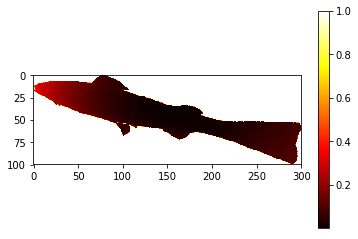

In [11]:
plt.imshow(dataset[img_id][0]['depth_map'], cmap='hot')
plt.colorbar()

In [43]:
test_dataset[img_id][1]

{'height': 20.43436130546165,
 'volume': 4205.6824656880935,
 'width': 17.02863442121804}